In [17]:
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns
import sweetviz as sv
import xgboost as xgb
import category_encoders as ce
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import preprocessing
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import FastICA
from sklearn.naive_bayes import GaussianNB
from pandas_profiling import ProfileReport
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [19]:
heart_dis_pred = pd.read_csv("heart_cleaned_encoded_smote.csv")

In [20]:
predictors = heart_dis_pred.drop("HeartDisease_No",axis=1)
target = heart_dis_pred["HeartDisease_No"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

# SGD with Scaling + SMOTE

In [21]:
%%time
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,Y_train)

Wall time: 2min 24s


SGDClassifier(tol=0.0001)

In [22]:
y_pred_sgd = sgd.predict(X_test)

In [23]:
pkl.dump(sgd, open('model_sgd.pkl', 'wb'))

In [24]:
yTest = Y_test.to_frame(name = "HeartDisease_No")
tn, fp, fn, tp = confusion_matrix(yTest, y_pred_sgd).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  46429 
False positives:  301 
False negatives:  42967 
True Positives:  3879


In [25]:
print(classification_report(yTest, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.52      0.99      0.68     46730
           1       0.93      0.08      0.15     46846

    accuracy                           0.54     93576
   macro avg       0.72      0.54      0.42     93576
weighted avg       0.72      0.54      0.42     93576



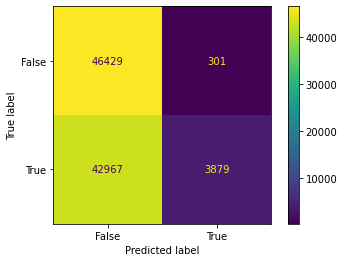

In [26]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(yTest['HeartDisease_No'], y_pred_sgd)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [27]:
test = pd.concat([X_test, Y_test], axis=1)

C:\Users\chemb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



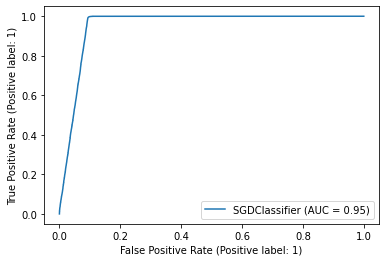

In [33]:
metrics.plot_roc_curve(sgd, X_test, Y_test)

# SGD with Scaling + SMOTE + PCA

In [36]:
heart_dis_train_pred = pd.read_csv("heart_cleaned_encoded_trained_pca.csv")
heart_dis_test_pred = pd.read_csv("heart_cleaned_encoded_tested_pca.csv")

In [37]:
%%time
features = ['principal component 1','principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9','principal component 10','principal component 11','principal component 12','principal component 13','principal component 14','principal component 15','principal component 16','principal component 17','principal component 18','principal component 19','principal component 20']
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(heart_dis_train_pred[features],heart_dis_train_pred["HeartDisease_No"])

Wall time: 7.54 s


SGDClassifier(tol=0.0001)

In [38]:
y_pred_sgd = sgd.predict(heart_dis_test_pred[features])

In [39]:
pkl.dump(sgd, open('model_sgd_pca.pkl', 'wb'))

In [43]:
tn, fp, fn, tp = metrics.confusion_matrix(heart_dis_test_pred["HeartDisease_No"], y_pred_sgd).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  3978 
False positives:  1497 
False negatives:  13899 
True Positives:  44585


In [41]:
print(classification_report(heart_dis_test_pred["HeartDisease_No"], y_pred_sgd))

              precision    recall  f1-score   support

           0       0.22      0.73      0.34      5475
           1       0.97      0.76      0.85     58484

    accuracy                           0.76     63959
   macro avg       0.60      0.74      0.60     63959
weighted avg       0.90      0.76      0.81     63959



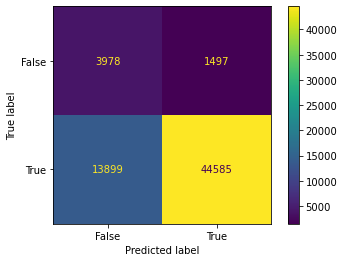

In [45]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(heart_dis_test_pred['HeartDisease_No'], y_pred_sgd)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [46]:
test = pd.concat([X_test, Y_test], axis=1)

C:\Users\chemb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



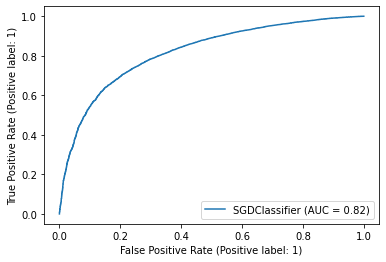

In [49]:
metrics.plot_roc_curve(sgd, heart_dis_test_pred[features], heart_dis_test_pred["HeartDisease_No"])

# SGD with Scaling + SMOTE + ICA

In [66]:
heart_dis_train_pred = pd.read_csv("heart_cleaned_encoded_trained_ica.csv")
heart_dis_test_pred = pd.read_csv("heart_cleaned_encoded_tested_ica.csv")

In [67]:
%%time
features = ['independent component 1','independent component 2','independent component 3','independent component 4','independent component 5','independent component 6','independent component 7','independent component 8','independent component 9','independent component 10','independent component 11','independent component 12','independent component 13','independent component 14','independent component 15','independent component 16','independent component 17','independent component 18','independent component 19','independent component 20']
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(heart_dis_train_pred[features],heart_dis_train_pred["HeartDisease_No"])

Wall time: 2.2 s


SGDClassifier(tol=0.0001)

In [68]:
y_pred_sgd = sgd.predict(heart_dis_test_pred[features])

In [52]:
pkl.dump(sgd, open('model_sgd_ica.pkl', 'wb'))

In [54]:
tn, fp, fn, tp = metrics.confusion_matrix(heart_dis_test_pred["HeartDisease_No"], y_pred_sgd).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  5475 
False positives:  0 
False negatives:  58484 
True Positives:  0


In [55]:
print(classification_report(heart_dis_test_pred["HeartDisease_No"], y_pred_sgd))

              precision    recall  f1-score   support

           0       0.09      1.00      0.16      5475
           1       0.00      0.00      0.00     58484

    accuracy                           0.09     63959
   macro avg       0.04      0.50      0.08     63959
weighted avg       0.01      0.09      0.01     63959



C:\Users\chemb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\chemb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\chemb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



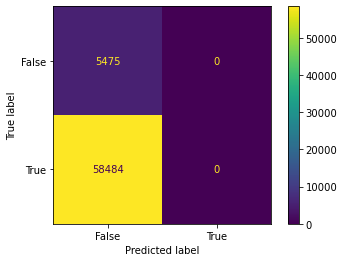

In [56]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(heart_dis_test_pred['HeartDisease_No'], y_pred_sgd)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

C:\Users\chemb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



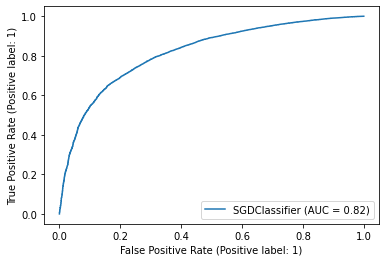

In [57]:
metrics.plot_roc_curve(sgd, heart_dis_test_pred[features], heart_dis_test_pred["HeartDisease_No"])

# SGD with Scaling + SMOTE + LDA

In [69]:
heart_dis_train_pred = pd.read_csv("heart_cleaned_encoded_trained_lda.csv")
heart_dis_test_pred = pd.read_csv("heart_cleaned_encoded_tested_lda.csv")

In [70]:
%%time
features = ['lda 1']
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(heart_dis_train_pred[features],heart_dis_train_pred["HeartDisease_No"])

Wall time: 1.65 s


SGDClassifier(tol=0.0001)

In [71]:
y_pred_sgd = sgd.predict(heart_dis_test_pred[features])

In [60]:
pkl.dump(sgd, open('model_sgd_lda.pkl', 'wb'))

In [62]:
tn, fp, fn, tp = metrics.confusion_matrix(heart_dis_test_pred["HeartDisease_No"], y_pred_sgd).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  4186 
False positives:  1289 
False negatives:  14524 
True Positives:  43960


In [63]:
print(classification_report(heart_dis_test_pred["HeartDisease_No"], y_pred_sgd))

              precision    recall  f1-score   support

           0       0.22      0.76      0.35      5475
           1       0.97      0.75      0.85     58484

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959



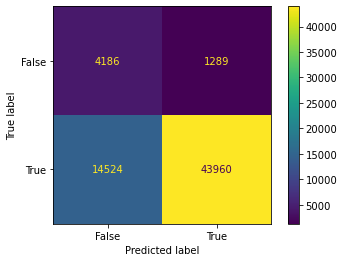

In [64]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(heart_dis_test_pred['HeartDisease_No'], y_pred_sgd)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

C:\Users\chemb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



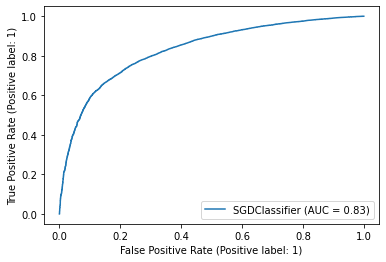

In [65]:
metrics.plot_roc_curve(sgd, heart_dis_test_pred[features], heart_dis_test_pred["HeartDisease_No"])